In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AllSensor.csv',encoding = "ISO-8859-1")
df.head(1)

,Unnamed: 0,Sensor Address,Time,Date,Temperature,Humidity,Light,Motion,CO2,VDDÊ
0,1,a8-17-58-ff-fe-03-93-d4,15:40:44,14/02/2020,22.6,33,2,0,711,3.627


In [3]:
df1 = df[df['Sensor Address']=='a8-17-58-ff-fe-03-93-d4']
df1.dropna
df1['DateTime'] = df1['Date'] + ' ' + df1['Time']
df1 = df1.drop(['Unnamed: 0'], axis =1)
df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S').dt.time
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y').dt.date
df1['DateTime'] = pd.to_datetime(df1['DateTime'], format='%d/%m/%Y %H:%M:%S')
df1['Minute']=df1.DateTime.dt.minute
df1['Hour']=df1.DateTime.dt.hour
df1.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sensor Address,Time,Date,Temperature,Humidity,Light,Motion,CO2,VDDÊ,DateTime,Minute,Hour
0,a8-17-58-ff-fe-03-93-d4,15:40:44,2020-02-14,22.6,33,2,0,711,3.627,2020-02-14 15:40:44,40,15
10,a8-17-58-ff-fe-03-93-d4,15:42:44,2020-02-14,22.6,33,3,0,712,3.624,2020-02-14 15:42:44,42,15
21,a8-17-58-ff-fe-03-93-d4,15:44:44,2020-02-14,22.5,33,2,0,694,3.627,2020-02-14 15:44:44,44,15
29,a8-17-58-ff-fe-03-93-d4,15:46:44,2020-02-14,22.6,33,3,0,717,3.627,2020-02-14 15:46:44,46,15
44,a8-17-58-ff-fe-03-93-d4,15:48:44,2020-02-14,22.6,33,2,0,706,3.627,2020-02-14 15:48:44,48,15


In [4]:
#df1.set_index('Date/Time')

In [5]:
df1.dtypes

Sensor Address            object
Time                      object
Date                      object
Temperature              float64
Humidity                   int64
Light                      int64
Motion                     int64
CO2                        int64
VDDÊ                     float64
DateTime          datetime64[ns]
Minute                     int64
Hour                       int64
dtype: object

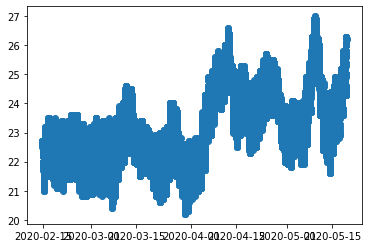

In [6]:
plt.scatter(df1['DateTime'],df1['Temperature'])

In [7]:
df1.head(15)

,Sensor Address,Time,Date,Temperature,Humidity,Light,Motion,CO2,VDDÊ,DateTime,Minute,Hour
0,a8-17-58-ff-fe-03-93-d4,15:40:44,2020-02-14,22.6,33,2,0,711,3.627,2020-02-14 15:40:44,40,15
10,a8-17-58-ff-fe-03-93-d4,15:42:44,2020-02-14,22.6,33,3,0,712,3.624,2020-02-14 15:42:44,42,15
21,a8-17-58-ff-fe-03-93-d4,15:44:44,2020-02-14,22.5,33,2,0,694,3.627,2020-02-14 15:44:44,44,15
29,a8-17-58-ff-fe-03-93-d4,15:46:44,2020-02-14,22.6,33,3,0,717,3.627,2020-02-14 15:46:44,46,15
44,a8-17-58-ff-fe-03-93-d4,15:48:44,2020-02-14,22.6,33,2,0,706,3.627,2020-02-14 15:48:44,48,15
57,a8-17-58-ff-fe-03-93-d4,15:50:44,2020-02-14,22.6,33,2,0,736,3.627,2020-02-14 15:50:44,50,15
71,a8-17-58-ff-fe-03-93-d4,15:52:44,2020-02-14,22.6,33,2,0,700,3.627,2020-02-14 15:52:44,52,15
227,a8-17-58-ff-fe-03-93-d4,16:14:44,2020-02-14,22.6,33,1,0,698,3.624,2020-02-14 16:14:44,14,16
238,a8-17-58-ff-fe-03-93-d4,16:16:44,2020-02-14,22.6,33,1,0,705,3.627,2020-02-14 16:16:44,16,16
250,a8-17-58-ff-fe-03-93-d4,16:18:44,2020-02-14,22.7,33,1,0,679,3.624,2020-02-14 16:18:44,18,16


In [8]:
df1 = df1.groupby(['Date','Hour'])

In [9]:
df1.head()

,Sensor Address,Time,Date,Temperature,Humidity,Light,Motion,CO2,VDDÊ,DateTime,Minute,Hour
0,a8-17-58-ff-fe-03-93-d4,15:40:44,2020-02-14,22.6,33,2,0,711,3.627,2020-02-14 15:40:44,40,15
10,a8-17-58-ff-fe-03-93-d4,15:42:44,2020-02-14,22.6,33,3,0,712,3.624,2020-02-14 15:42:44,42,15
21,a8-17-58-ff-fe-03-93-d4,15:44:44,2020-02-14,22.5,33,2,0,694,3.627,2020-02-14 15:44:44,44,15
29,a8-17-58-ff-fe-03-93-d4,15:46:44,2020-02-14,22.6,33,3,0,717,3.627,2020-02-14 15:46:44,46,15
44,a8-17-58-ff-fe-03-93-d4,15:48:44,2020-02-14,22.6,33,2,0,706,3.627,2020-02-14 15:48:44,48,15
...,...,...,...,...,...,...,...,...,...,...,...,...
888418,a8-17-58-ff-fe-03-93-d4,09:09:50,2020-05-19,26.0,34,398,0,574,3.624,2020-05-19 09:09:50,9,9
888427,a8-17-58-ff-fe-03-93-d4,09:11:50,2020-05-19,26.0,34,401,0,559,3.624,2020-05-19 09:11:50,11,9
888435,a8-17-58-ff-fe-03-93-d4,09:13:50,2020-05-19,26.0,34,396,0,577,3.622,2020-05-19 09:13:50,13,9
888705,a8-17-58-ff-fe-03-93-d4,10:15:50,2020-05-19,26.2,34,309,0,522,3.624,2020-05-19 10:15:50,15,10


In [10]:
df2 = df1['Temperature','Humidity','Light','Motion','CO2'].mean()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [11]:
df2.head(10)

Temperature   Humidity     Light  Motion         CO2
Date       Hour                                                      
2020-02-14 15      22.585714  33.000000  2.285714     0.0  710.857143
           16      22.684615  33.000000  0.615385     0.0  682.769231
           17      22.650000  33.437500  0.000000     0.0  642.000000
           18      22.530769  34.000000  0.000000     0.0  605.923077
           19      22.358333  34.000000  0.000000     0.0  606.166667
           20      22.452941  34.294118  0.000000     0.0  632.647059
           21      22.533333  34.833333  0.000000     0.0  645.416667
           22      22.463158  35.000000  0.000000     0.0  631.684211
           23      22.336364  35.000000  0.000000     0.0  611.272727
2020-02-15 0       22.088889  35.500000  0.000000     0.0  595.222222

In [12]:
df2 = df2.reset_index()


In [13]:
df3 = df2.groupby(['Date'])
df3 = df3['Temperature'].mean()
df3 = df3.reset_index()

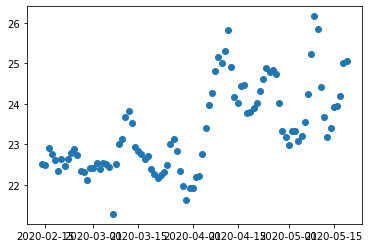

In [14]:
plt.scatter(df3['Date'],df3['Temperature'])

In [15]:
weather=pd.read_csv('weather.csv',encoding = "ISO-8859-1")
df.head(1)

FileNotFoundError: [Errno 2] No such file or directory: 'weather.csv'